# Preprocessing: merging NYC311 and PLUTO dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
df_comp = pd.read_csv('df_prep_200k.csv')
df_comp

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude,hour,month,year
0,45284700.0,2019-12-31 15:02:46,ELECTRIC,10031.0,605 WEST 142 STREET,WEST 142 STREET,NEW YORK,Closed,MANHATTAN,40.824694,-73.952255,15.0,12.0,2019.0
1,45284480.0,2019-12-31 18:39:21,PAINT/PLASTER,11423.0,91-21 195 STREET,195 STREET,Hollis,Closed,QUEENS,40.712909,-73.765953,18.0,12.0,2019.0
2,45281951.0,2019-12-31 13:14:22,WATER LEAK,10463.0,3008 KINGSBRIDGE AVENUE,KINGSBRIDGE AVENUE,BRONX,Closed,BRONX,40.878598,-73.907716,13.0,12.0,2019.0
3,45281658.0,2019-12-31 18:29:57,GENERAL,10472.0,1233 WHITE PLAINS ROAD,WHITE PLAINS ROAD,BRONX,Closed,BRONX,40.831489,-73.862073,18.0,12.0,2019.0
4,45281388.0,2019-12-31 18:41:56,HEAT/HOT WATER,11365.0,159-10 71 AVENUE,71 AVENUE,Fresh Meadows,Closed,QUEENS,40.730344,-73.809384,18.0,12.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211988,44060230.0,2019-10-15 20:29:04,HEAT/HOT WATER,10026.0,2196 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,NEW YORK,Closed,MANHATTAN,40.805981,-73.954215,20.0,10.0,2019.0
211989,44061331.0,2019-10-15 12:13:52,HEAT/HOT WATER,11225.0,580 FLATBUSH AVENUE,FLATBUSH AVENUE,BROOKLYN,Closed,BROOKLYN,40.659576,-73.960577,12.0,10.0,2019.0
211990,44061354.0,2019-10-15 07:33:41,HEAT/HOT WATER,10468.0,2800 UNIVERSITY AVENUE,UNIVERSITY AVENUE,BRONX,Closed,BRONX,40.871572,-73.899193,7.0,10.0,2019.0
211991,44063499.0,2019-10-15 16:57:42,HEAT/HOT WATER,10467.0,15 EAST MOSHOLU PARKWAY NORTH,EAST MOSHOLU PARKWAY NORTH,BRONX,Closed,BRONX,40.879973,-73.883536,16.0,10.0,2019.0


In [4]:
df_pluto = pd.read_csv('df_pluto_fixed_cols_2.csv')
df_pluto

,Borough,ZipCode,Address,LandUse,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,...,BldgDepth,LotType,BsmtCode,AssessTot,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,BX,10454.0,126 BRUCKNER BOULEVARD,7.0,13770,752,752,0,272,0,...,16.00,5.0,0.0,326700,1931,1994,0.05,6.02,5.0,6.5
1,BX,10454.0,138 BRUCKNER BOULEVARD,6.0,35000,39375,39375,0,0,0,...,200.00,4.0,0.0,879300,1931,0,1.13,6.02,5.0,6.5
2,BX,10454.0,144 BRUCKNER BOULEVARD,2.0,2500,12500,0,12500,0,0,...,85.00,5.0,0.0,332550,1931,2001,5.00,6.02,5.0,6.5
3,BX,10454.0,148 BRUCKNER BOULEVARD,2.0,1875,8595,1719,6876,0,1719,...,70.00,3.0,2.0,125304,1920,2009,4.58,6.02,5.0,6.5
4,BX,10454.0,519 EAST 132 STREET,6.0,8700,5316,5316,0,0,0,...,100.00,5.0,0.0,153900,1931,0,0.61,6.02,5.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83040,BX,10471.0,6027 RIVERDALE AVENUE,1.0,3891,1512,0,1512,0,0,...,28.00,5.0,2.0,35797,1940,0,0.39,0.50,0.0,1.0
83041,BX,10471.0,6007 RIVERDALE AVENUE,1.0,1900,1044,0,1044,0,0,...,29.00,5.0,2.0,28663,1910,0,0.55,0.90,0.0,2.0
83042,BX,10471.0,6301 RIVERDALE AVENUE,8.0,1845000,237021,237021,0,0,0,...,35.00,5.0,0.0,33597000,1848,2006,0.13,0.90,0.0,2.0
83043,BX,10471.0,755 WEST 261 STREET,8.0,257775,83366,83366,0,0,0,...,121.75,5.0,0.0,11458800,1956,0,0.32,0.90,0.0,2.0


In [5]:
def check_values(df):
    col_desc = []
    data = {
        'features': [col for col in df.columns],
        'data_type': [df[col].dtype for col in df.columns],
        'nan_total': [df[col].isna().sum() for col in df.columns],
        'nan_pct': [round(df[col].isna().sum()/len(df)*100,2) for col in df.columns],
        'unique': [df[col].nunique() for col in df.columns],
        'values_ex': [df[col].drop_duplicates().sample(df[col].nunique()).values if df[col].nunique() <= 5 else df[col].drop_duplicates().sample(2).values for col in df.columns]
    }
    return pd.DataFrame(data)

In [6]:
df_pluto.Address.nunique()

82961

In [7]:
df_comp['Incident Address'].nunique()

47550

### merging complaint datafame with PLUTO dataframe based on the Incident Address

In [8]:
# df_comp_pluto = df_pluto.merge(df_comp[['Incident Address', 'Complaint Type', 'Latitude', 'Longitude']], right_on='Incident Address', left_on='Address', how='left')
# df_comp_pluto
df_comp_pluto = df_pluto.merge(df_comp[['Incident Address', 'Complaint Type', 'Latitude', 'Longitude']], right_on='Incident Address', left_on='Address')
df_comp_pluto

,Borough,ZipCode,Address,LandUse,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,...,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,Incident Address,Complaint Type,Latitude,Longitude
0,BX,10454.0,147 BRUCKNER BOULEVARD,2.0,2500,11500,2324,9176,0,2324,...,1925,0,4.60,3.0,2.0,3.0,147 BRUCKNER BOULEVARD,UNSANITARY CONDITION,40.803750,-73.920130
1,BX,10454.0,147 BRUCKNER BOULEVARD,2.0,2500,11500,2324,9176,0,2324,...,1925,0,4.60,3.0,2.0,3.0,147 BRUCKNER BOULEVARD,GENERAL,40.803750,-73.920130
2,BX,10454.0,147 BRUCKNER BOULEVARD,2.0,2500,11500,2324,9176,0,2324,...,1925,0,4.60,3.0,2.0,3.0,147 BRUCKNER BOULEVARD,HEAT/HOT WATER,40.803750,-73.920130
3,BX,10454.0,147 BRUCKNER BOULEVARD,2.0,2500,11500,2324,9176,0,2324,...,1925,0,4.60,3.0,2.0,3.0,147 BRUCKNER BOULEVARD,ELECTRIC,40.803750,-73.920130
4,BX,10454.0,147 BRUCKNER BOULEVARD,2.0,2500,11500,2324,9176,0,2324,...,1925,0,4.60,3.0,2.0,3.0,147 BRUCKNER BOULEVARD,ELECTRIC,40.803750,-73.920130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58917,BX,10471.0,5700 ARLINGTON AVENUE,3.0,255000,404890,0,404890,0,0,...,1961,0,1.59,0.9,0.0,2.0,5700 ARLINGTON AVENUE,PLUMBING,40.906656,-73.906827
58918,BX,10471.0,5900 ARLINGTON AVENUE,3.0,234275,407920,0,407920,0,0,...,1962,0,1.74,0.9,0.0,2.0,5900 ARLINGTON AVENUE,WATER LEAK,40.908632,-73.906499
58919,BX,10471.0,5900 ARLINGTON AVENUE,3.0,234275,407920,0,407920,0,0,...,1962,0,1.74,0.9,0.0,2.0,5900 ARLINGTON AVENUE,ELECTRIC,40.908632,-73.906499
58920,BX,10471.0,5900 ARLINGTON AVENUE,3.0,234275,407920,0,407920,0,0,...,1962,0,1.74,0.9,0.0,2.0,5900 ARLINGTON AVENUE,PAINT/PLASTER,40.908632,-73.906499


In [9]:
df_comp_pluto.isna().sum()

Borough             0
ZipCode             0
Address             0
LandUse             0
LotArea             0
BldgArea            0
ComArea             0
ResArea             0
OfficeArea          0
RetailArea          0
GarageArea          0
StrgeArea           0
FactryArea          0
OtherArea           0
NumBldgs            0
NumFloors           0
UnitsTotal          0
BldgFront           0
BldgDepth           0
LotType             0
BsmtCode            0
AssessTot           0
YearBuilt           0
YearAlter1          0
BuiltFAR            0
ResidFAR            0
CommFAR             0
FacilFAR            0
Incident Address    0
Complaint Type      0
Latitude            0
Longitude           0
dtype: int64

In [10]:
df_comp_pluto['Complaint Type'].unique()

array(['UNSANITARY CONDITION', 'GENERAL', 'HEAT/HOT WATER', 'ELECTRIC',
       'WATER LEAK', 'DOOR/WINDOW', 'PLUMBING', 'PAINT/PLASTER',
       'APPLIANCE', 'OUTSIDE BUILDING', 'FLOORING/STAIRS', 'SAFETY',
       'ELEVATOR'], dtype=object)

In [11]:
df_comp_pluto['Heat'] = np.where(df_comp_pluto['Complaint Type'] == 'HEAT/HOT WATER', 1, 0)
df_comp_pluto['Heat'].head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: Heat, dtype: int32

In [12]:
df_comp_pluto.columns

Index(['Borough', 'ZipCode', 'Address', 'LandUse', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'UnitsTotal', 'BldgFront', 'BldgDepth', 'LotType', 'BsmtCode',
       'AssessTot', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'Incident Address', 'Complaint Type', 'Latitude',
       'Longitude', 'Heat'],
      dtype='object')

checking merging result

In [13]:
len(set(df_comp['Incident Address'].unique()) - set(df_comp_pluto['Incident Address']))

38650

In [14]:
missing_address = list(set(df_comp['Incident Address'].unique()) - set(df_comp_pluto['Incident Address']))
missing_address[:20]

['584 WILLIAMS AVENUE',
 '51-23 REEDER STREET',
 '62 SOUTH ELLIOTT PLACE',
 '365 COLUMBIA STREET',
 '228 WEST 116 STREET',
 '50 HORATIO STREET',
 '532 PINE STREET',
 '829 MONROE STREET',
 '154 WEIRFIELD STREET',
 '935 EASTERN PARKWAY',
 '549 51 STREET',
 '161-33 128 AVENUE',
 '69-29 66 PLACE',
 '522 WEST 159 STREET',
 '124 VAN SICLEN AVENUE',
 '1354 EAST 88 STREET',
 '1850 OCEAN AVENUE',
 '24 PAERDEGAT 15 STREET',
 '331 BEACH 68 STREET',
 '1864 85 STREET']

In [15]:
df_pluto.Address.isin(missing_address).sum()

0

In [16]:
df_comp_pluto.groupby('Incident Address')['Incident Address'].count().sort_values(ascending=False)

Incident Address
1025 BOYNTON AVENUE       570
1515 SELWYN AVENUE        205
3451 GILES PLACE          198
750 GRAND CONCOURSE       190
2040 BRONXDALE AVENUE     171
                         ... 
53 EAST 182 STREET          1
2261 CRESTON AVENUE         1
2261 GRAND AVENUE           1
2261 RYER AVENUE            1
999 SOUTHERN BOULEVARD      1
Name: Incident Address, Length: 8900, dtype: int64

In [17]:
df_comp_pluto[df_comp_pluto['Incident Address'] == '410 EASTERN PARKWAY']

,Borough,ZipCode,Address,LandUse,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,...,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,Incident Address,Complaint Type,Latitude,Longitude,Heat


several rows having different Zip Code from the complaint dataframe and PLUTO dataframe will be dropped

In [18]:
df_comp_pluto.isna().sum()/len(df_comp_pluto)*100

Borough             0.0
ZipCode             0.0
Address             0.0
LandUse             0.0
LotArea             0.0
BldgArea            0.0
ComArea             0.0
ResArea             0.0
OfficeArea          0.0
RetailArea          0.0
GarageArea          0.0
StrgeArea           0.0
FactryArea          0.0
OtherArea           0.0
NumBldgs            0.0
NumFloors           0.0
UnitsTotal          0.0
BldgFront           0.0
BldgDepth           0.0
LotType             0.0
BsmtCode            0.0
AssessTot           0.0
YearBuilt           0.0
YearAlter1          0.0
BuiltFAR            0.0
ResidFAR            0.0
CommFAR             0.0
FacilFAR            0.0
Incident Address    0.0
Complaint Type      0.0
Latitude            0.0
Longitude           0.0
Heat                0.0
dtype: float64

In [36]:
df_comp_pluto.drop(columns=['Incident Address', 'Complaint Type'], inplace=True)

## making new columns

In [19]:
df_comp_pluto['AlterAge'] = 0
df_comp_pluto.loc[df_comp_pluto.YearAlter1 > df_comp_pluto.YearBuilt, 'AlterAge'] = df_comp_pluto['YearAlter1'] - df_comp_pluto['YearBuilt']
df_comp_pluto[['YearAlter1', 'YearBuilt', 'AlterAge']].head(10)

,YearAlter1,YearBuilt,AlterAge
0,0,1925,0
1,0,1925,0
2,0,1925,0
3,0,1925,0
4,0,1925,0
5,0,1925,0
6,0,1925,0
7,1983,1906,77
8,1983,1906,77
9,0,2001,0


In [20]:
df_comp_pluto.AlterAge.isna().sum()

0

there are many invalid values on YearAlter1 (earlier than YearBuilt) -> fill with np.nan

In [21]:
df_comp_pluto[(df_comp_pluto.YearAlter1 < df_comp_pluto.YearBuilt) & (df_comp_pluto.YearAlter1 != 0)][['YearAlter1', 'YearBuilt', 'AlterAge']]

,YearAlter1,YearBuilt,AlterAge
611,2016,2017,0
1839,2011,2012,0
1840,2011,2012,0
1841,2011,2012,0
1842,2011,2012,0
...,...,...,...
53612,2012,2013,0
53664,2003,2005,0
55705,1996,2003,0
55706,1996,2003,0


In [22]:
df_comp_pluto.loc[(df_comp_pluto.YearAlter1 < df_comp_pluto.YearBuilt) & (df_comp_pluto.YearAlter1 != 0), 'AlterAge'] = np.nan
df_comp_pluto[(df_comp_pluto.YearAlter1 < df_comp_pluto.YearBuilt) & (df_comp_pluto.YearAlter1 != 0)][['YearAlter1', 'YearBuilt', 'AlterAge']]

,YearAlter1,YearBuilt,AlterAge
611,2016,2017,NaN
1839,2011,2012,NaN
1840,2011,2012,NaN
1841,2011,2012,NaN
1842,2011,2012,NaN
...,...,...,...
53612,2012,2013,NaN
53664,2003,2005,NaN
55705,1996,2003,NaN
55706,1996,2003,NaN


In [23]:
df_comp_pluto.dropna(subset=['AlterAge'], inplace=True)
len(df_comp_pluto)

58832

In [26]:
check_values(df_comp_pluto)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Borough,object,0,0.0,1,[BX]
1,ZipCode,float64,0,0.0,25,"[10452.0, 10454.0]"
2,Address,object,0,0.0,8875,"[1872 MONROE AVENUE, 2104 HUGHES AVENUE]"
3,LandUse,float64,0,0.0,10,"[7.0, 1.0]"
4,LotArea,int64,0,0.0,3846,"[2665, 2195]"
5,BldgArea,int64,0,0.0,5021,"[1794, 2394]"
6,ComArea,int64,0,0.0,745,"[900, 2006]"
7,ResArea,int64,0,0.0,4915,"[2083, 28565]"
8,OfficeArea,int64,0,0.0,167,"[1809, 612]"
9,RetailArea,int64,0,0.0,481,"[22623, 4688]"


In [43]:
# df_comp_pluto.dropna(subset=['LandUse'], inplace=True)
# len(df_comp_pluto)

186036

In [46]:
# %%time
# df_comp_pluto.to_csv('df_comp_pluto_training.csv', index=False)
# print('Finished')

Finished
Wall time: 46 s


In [44]:
%%time
df_comp_pluto.to_csv('df_database.csv', index=False)
print('Finished')

Finished
Wall time: 13.4 s


In [27]:
%%time
df_comp_pluto.to_csv('df_merged_3.csv', index=False)
print('Finished')

Finished
Wall time: 6.7 s


### adding complaint count columns for top 10 complaints

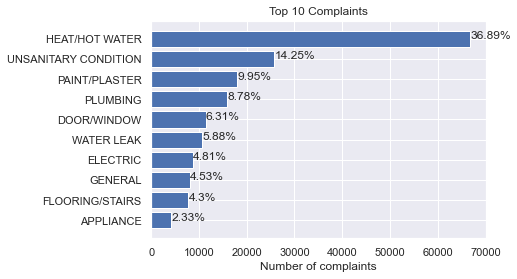

In [69]:
plt.barh(df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index, df_complaint.head(10).sort_values(by='Complaint Type', ascending=True)['Complaint Type'].head(10))
for i in df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index:
    plt.annotate(f"{df_complaint.loc[i, '%']}%",
             xy=(df_complaint.loc[i, 'Complaint Type']+3, i))
plt.title('Top 10 Complaints')
plt.xlabel('Number of complaints')
plt.show()

In [50]:
df_comp_pluto['Incident Zip'].nunique()

180

In [72]:
top10comp = df_complaint.head(10).index.values
top10comp

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'PAINT/PLASTER',
       'PLUMBING', 'DOOR/WINDOW', 'WATER LEAK', 'ELECTRIC', 'GENERAL',
       'FLOORING/STAIRS', 'APPLIANCE'], dtype=object)

In [85]:
def make_comp_zip(topcomp):
    comp_zip =[]
    for comp in topcomp:
        comp_zip.append(df_comp_pluto[df_comp_pluto['Complaint Type']== comp]['Incident Zip'].value_counts()\
.to_frame().rename(columns={'Incident Zip':comp}))
    return comp_zip

def make_count_cols(comp_zip, topcomp):
    for zip_i, complaint in zip(comp_zip, topcomp):
        df_comp_pluto[complaint+'_count'] = 0
        for i, j in zip(zip_i.index.values, zip_i.iloc[:,0].values):
            df_comp_pluto.loc[df_comp_pluto['Incident Zip']==i, complaint+'_count'] = j

In [86]:
comp_zip = make_comp_zip(top10comp)
make_count_cols(comp_zip, top10comp)

In [90]:
df_comp_pluto.iloc[:,-11:]

,AlterAge,HEAT/HOT WATER_count,UNSANITARY CONDITION_count,PAINT/PLASTER_count,PLUMBING_count,DOOR/WINDOW_count,WATER LEAK_count,ELECTRIC_count,GENERAL_count,FLOORING/STAIRS_count,APPLIANCE_count
0,75.0,1679,495,459,361,307,254,180,188,223,94
1,75.0,1679,495,459,361,307,254,180,188,223,94
2,75.0,1679,495,459,361,307,254,180,188,223,94
3,0.0,96,43,25,28,17,18,26,9,10,8
4,0.0,96,43,25,28,17,18,26,9,10,8
...,...,...,...,...,...,...,...,...,...,...,...
186456,0.0,741,421,279,276,196,192,169,133,116,76
186457,0.0,825,392,274,219,169,157,113,89,116,61
186458,32.0,856,243,208,166,103,105,105,120,97,44
186459,0.0,1815,671,595,429,386,318,191,205,258,119


In [91]:
# %%time
# df_comp_pluto.to_csv('df_comp_pluto_merged.csv')
# print('Finished')

Finished
Wall time: 19.4 s
